# Import dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
import os
# import plotly.offline as py
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
# from plotly import tools

dataset = pd.read_csv('avocado.csv')

# Data preprocessing

In [2]:
# dataset.shape
# dataset.tail() # the last n rows
# dataset.head() # view first five lines
# dataset.info() # check if we have missing values (18249 complete data and 14 columns)

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['month']=dataset['Date'].apply(lambda x:x.month)
dataset['day']=dataset['Date'].apply(lambda x:x.day)
# dataset.head()
dataset.describe()
dataset.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

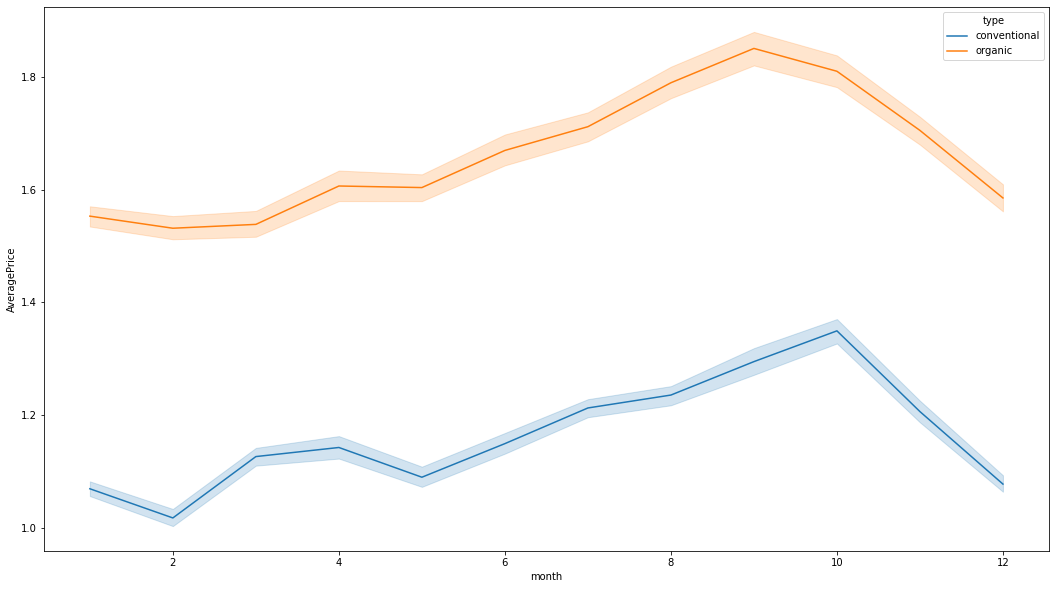

In [3]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=dataset)
plt.show()

<AxesSubplot:xlabel='type'>

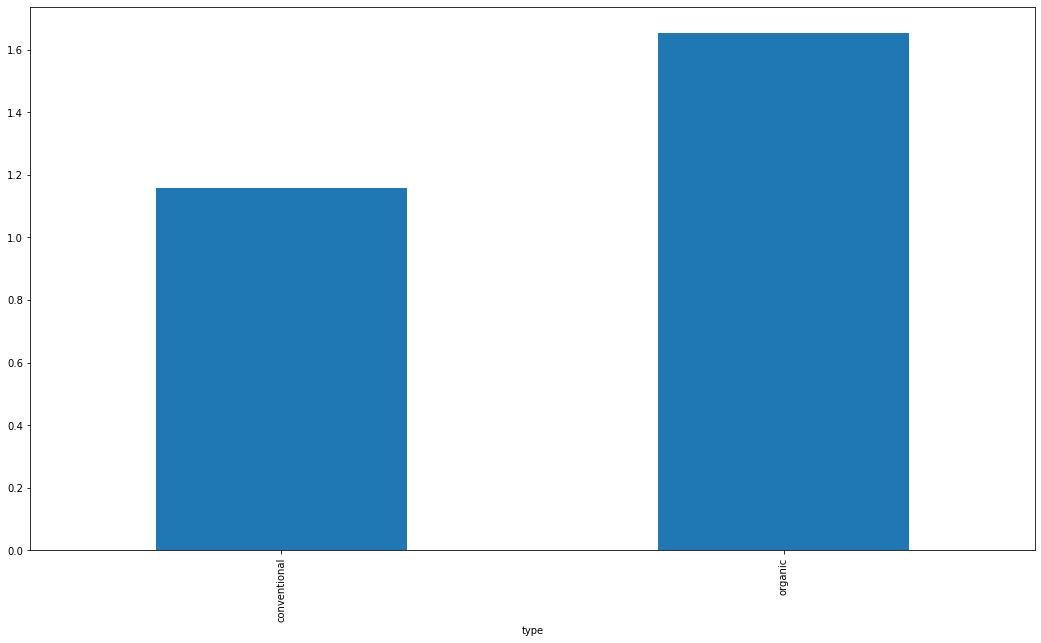

In [4]:
df=dataset
plt.figure(figsize=(18,10))
df.groupby([df['type']])['AveragePrice'].mean().plot.bar()

# Exploratory analysis

## Analysis of average price

Text(0.5, 1.0, 'Average Price')

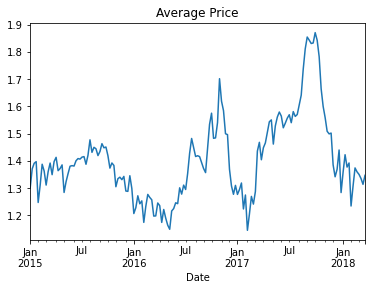

In [11]:
byDate=dataset.groupby('Date').mean() #combine same day prices and get the mean
# plt.figure(figsize=(17,8),dpi=250)
byDate['AveragePrice'].plot()
plt.title('Average Price') # average price over time

<AxesSubplot:xlabel='year'>

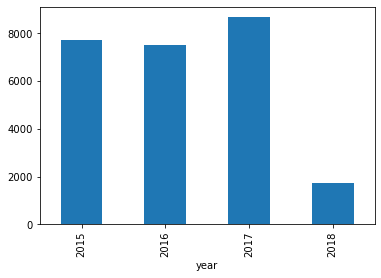

In [12]:
# plt.figure(figsize=(18,10))
df.groupby([df.year])['AveragePrice'].sum().plot.bar()

Text(0.5, 1.0, 'Average Price Per Month')

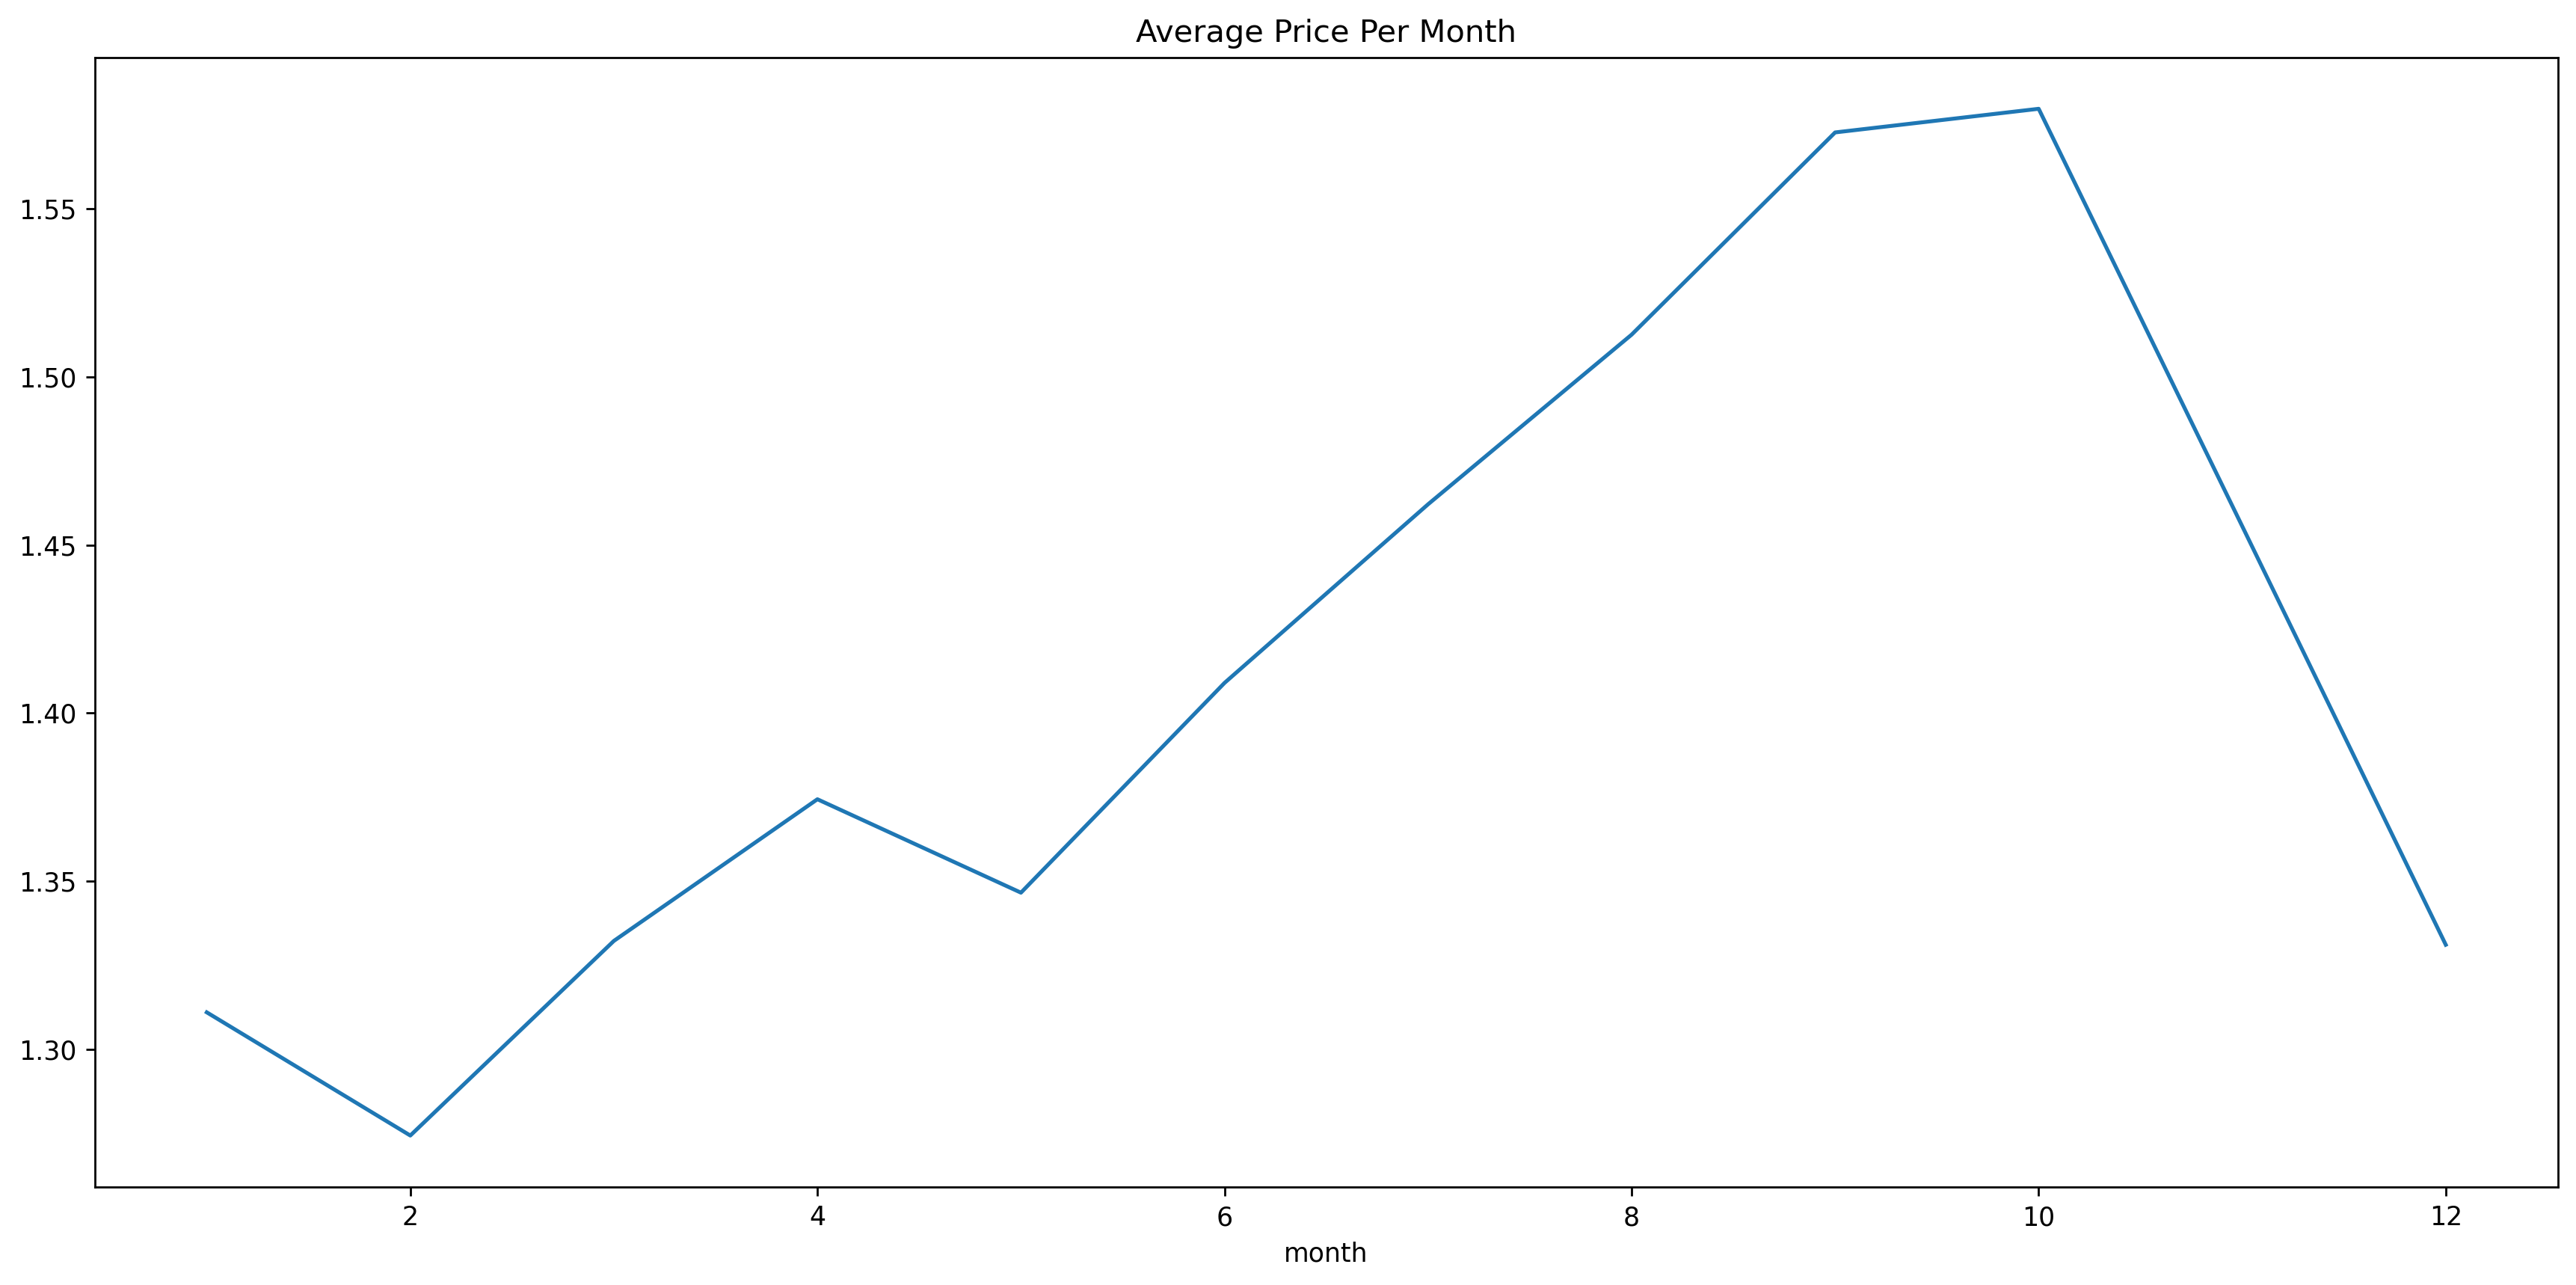

In [7]:
byMonth = dataset.groupby("month").mean()
plt.figure(figsize=(17,8),dpi=250)
byMonth['AveragePrice'].plot()
# plt.plot(["1","2","3","4","5","6","7","8","9","10","11","12"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

In [8]:
plt.figure(figsize=(20,6)
df.groupby([df.region])['AveragePrice'].sum().plot.bar()
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

SyntaxError: invalid syntax (Temp/ipykernel_28684/3485269539.py, line 2)

Text(0.5, 1.0, 'Average Price Per Day')

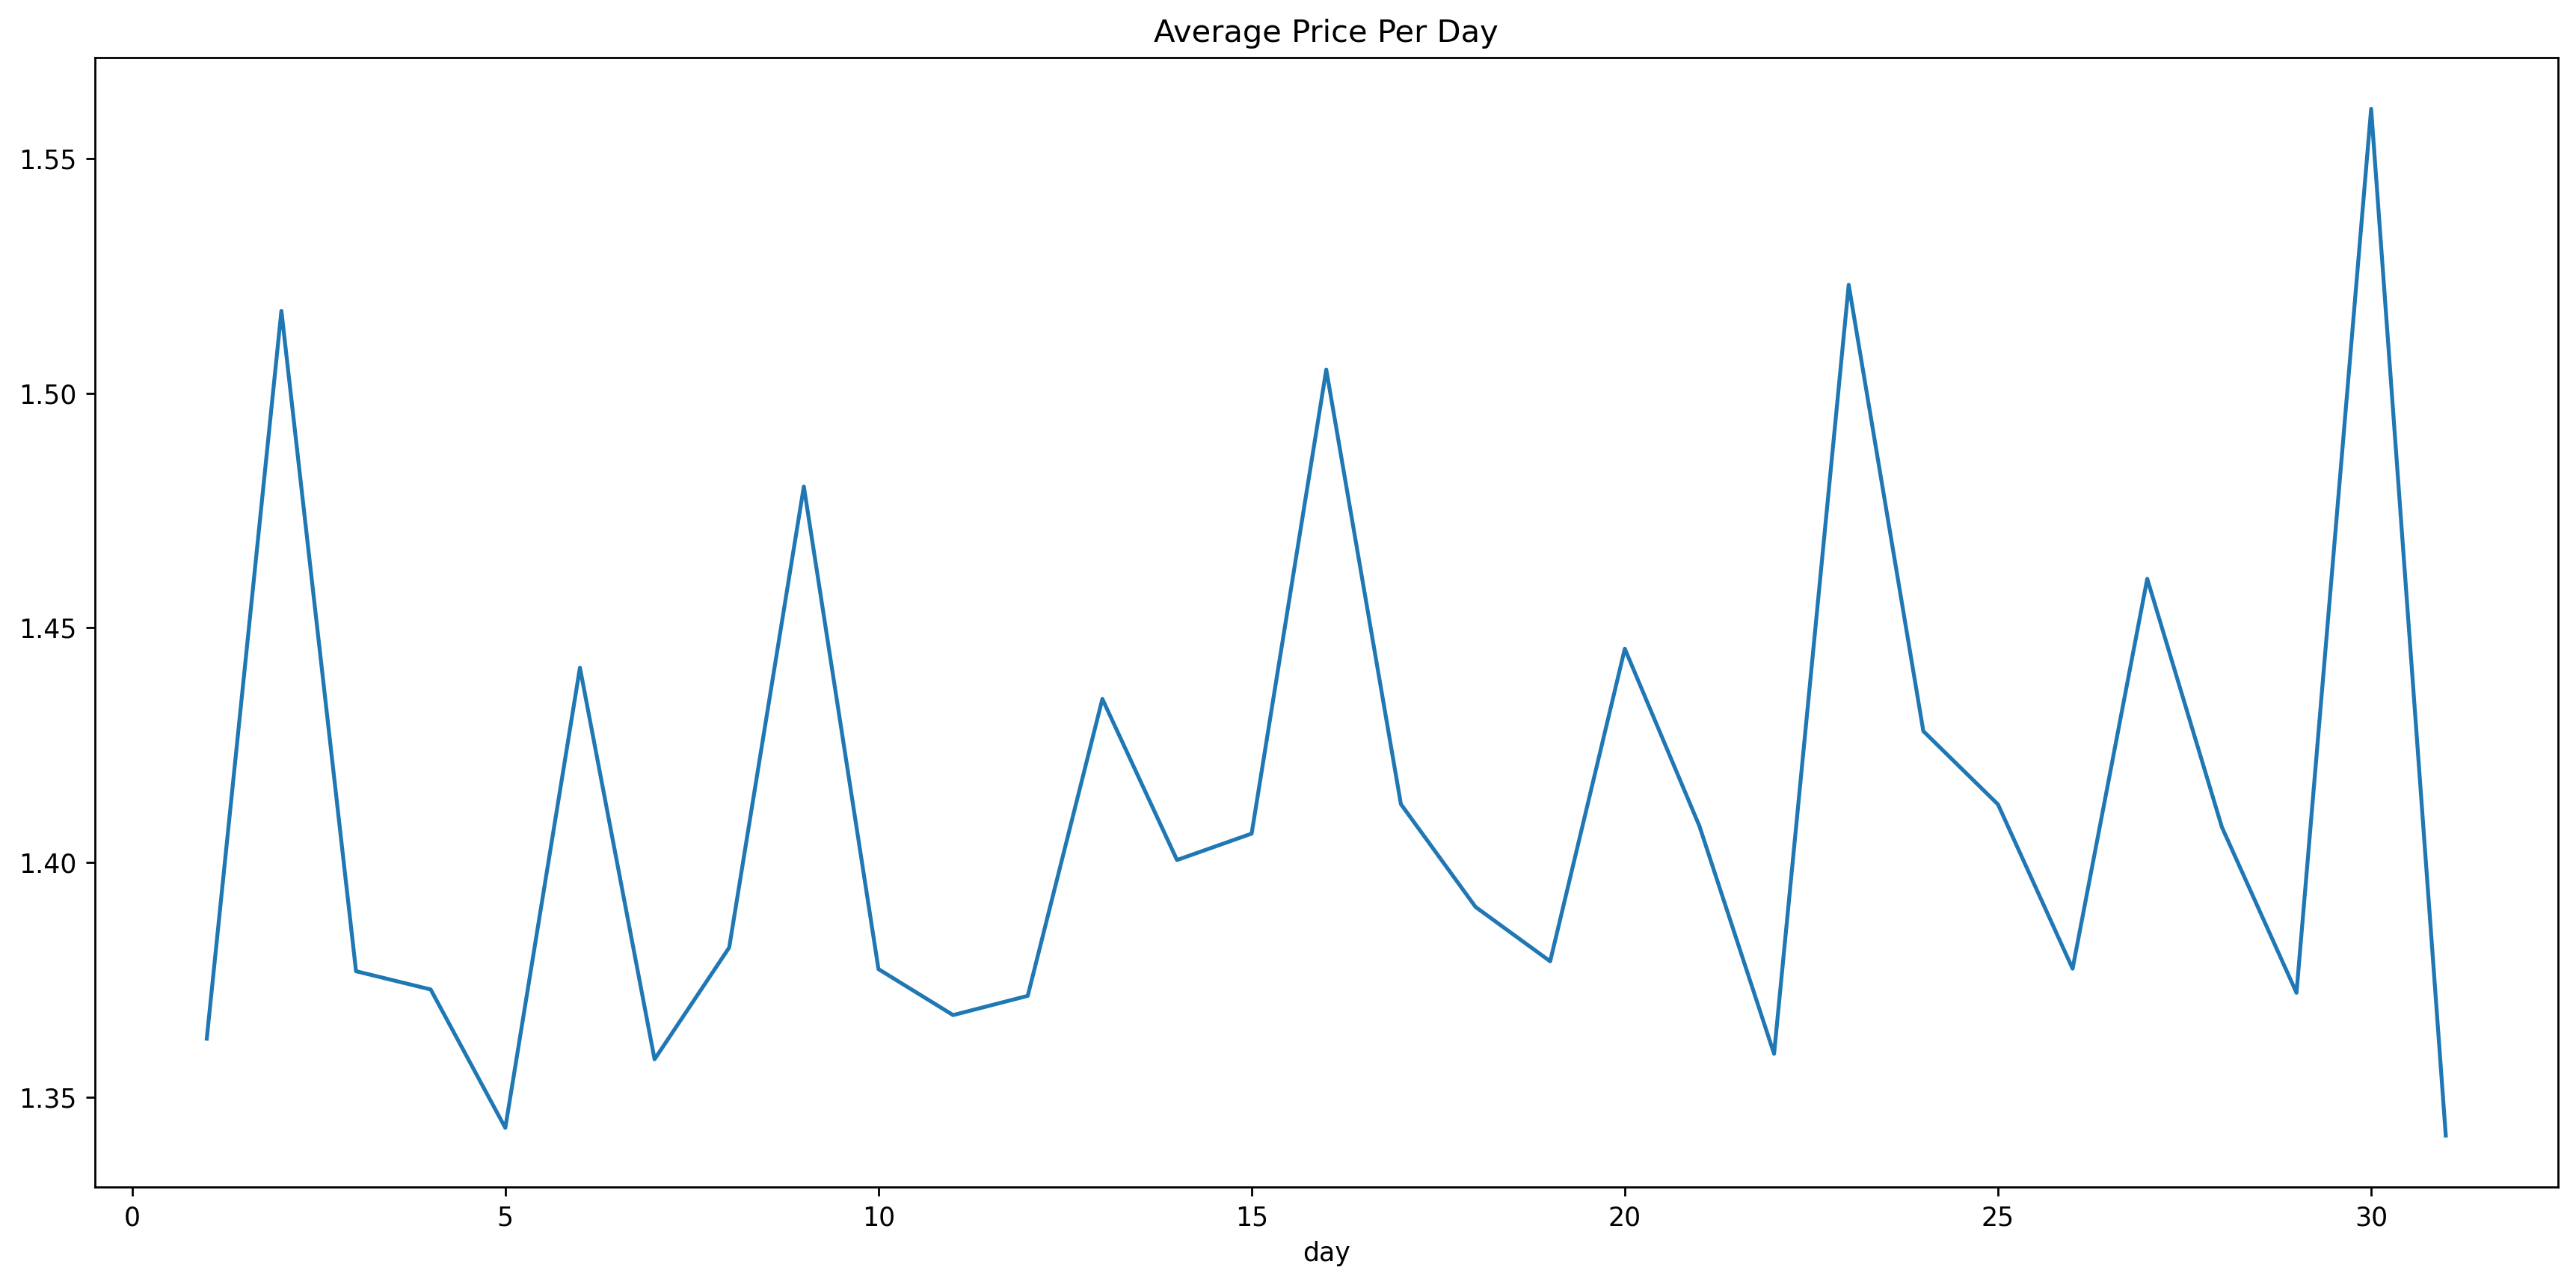

In [10]:
byDay = dataset.groupby("day").mean()
plt.figure(figsize=(17,8),dpi=250)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

In [ ]:
byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
# plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

In [ ]:
plt.figure(figsize=(15,10),dpi=250)
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

In [ ]:
g = sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
#                    size=18,
#                    aspect=0.7,
                   palette='Blues',
                   join=False,
              )

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

In [ ]:
df=dataset
df['region'].nunique() #54
df['type'].nunique() #2

In [ ]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final.head()

# Train-test split, Model selection, Make predictions

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score # split data randomly into train and test subsets
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler # standarization
from sklearn import metrics

In [ ]:
X=df_final.iloc[:,2:14]
y=df_final['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X)
X.shape, y.shape

# Create and train the model

In [ ]:
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print('MAE:', metrics.mean_absolute_error(y_test, pred))
    print('MSE:', metrics.mean_squared_error(y_test, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('CV Score:', cv_score)
#     The coefficient of determination: 1 is perfect prediction
#     print("Coefficient of determination: %.2f" % r2_score(y_test, pred))
#     print("Accuracy score:", metrics.accuracy_score(y_test, pred))
        
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)


# linear regression

In [ ]:
lr=LinearRegression()
train(lr,X,y)
X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred.shape

In [ ]:
# plt.scatter(X_test,y_test,color="black")
# plt.plot(X_test, pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Bayesian Ridge Regression

In [ ]:
br = BayesianRidge(compute_score=True)
train(br,X,y)

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
X_train_modified = X_train
Linear_sk = LinearRegression()
Linear_sk.fit(X_train_modified, y_train)
errors_linear_sk = mean_squared_error(Linear_sk.predict(X_test,y_test)
empirical_Bayes_sk = BayesianRidge()
empirical_Bayes_sk.fit(X_test, y_train)
errors_empirical_sk = mean_squared_error(empirical_Bayes_sk.predict(X_test,y_test)
print('Linear Regression MSE:',errors_linear,' sklearn Linear Regression MSE:', errors_linear_sk)
print('empirical Bayes MSE:',errors_embayes,' sklearn empirical Bayes MSE:', errors_empirical_sk)

In [ ]:
# x = dataset.iloc[:, 1:2].values
# y = dataset.iloc[:, 2].values
# print(x)
# print(y)

In [ ]:
# X=dataset.year
# print(X.shape)
# print(Y.shape)
# Y=dataset.AveragePrice
# l_reg=linear_model.LinearRegression
# plt.scatter(X.T[0], Y)
# plt.show()
# # 503 13

In [ ]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x = sc_X.fit_transform(x)
# y = sc_y.fit_transform(y)